In [1]:
from preprocess_text import preprocess_text

In [2]:
import pandas as pd

def preprocess_and_save(input_file, output_file):
    # Function to preprocess text from input_file
    # Assuming preprocess_text() is defined elsewhere
    df = preprocess_text(input_file)
    
    # Save processed data to CSV
    df.to_csv(output_file, index=False)
    
    print(f"Lyrics have been saved to '{output_file}'")

# Example usage:
input_file = './Lyrical_Verses/Enumerated_GreenEggsAndHam.txt'
output_file = './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'

preprocess_and_save(input_file, output_file)


Lyrics have been saved to './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'


In [3]:
df = pd.read_csv('./Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv')
df

,Work Title,Subdivision Title,Line
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam
4,green eggs and ham by doctor seuss,stanza 4,i do not like green eggs and ham
...,...,...,...
99,green eggs and ham by doctor seuss,stanza 30,and i will eat them with a mouse
100,green eggs and ham by doctor seuss,stanza 30,and i will eat them here and there
101,green eggs and ham by doctor seuss,stanza 30,say i will eat them anywhere
102,green eggs and ham by doctor seuss,stanza 30,i do so like green eggs and ham


## Contextual Embeddings BERT


In [5]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and generate embeddings
def get_bert_embeddings(lines, tokenizer, model):
    inputs = tokenizer(lines, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

embeddings = get_bert_embeddings(df['Line'].tolist(), tokenizer, model)


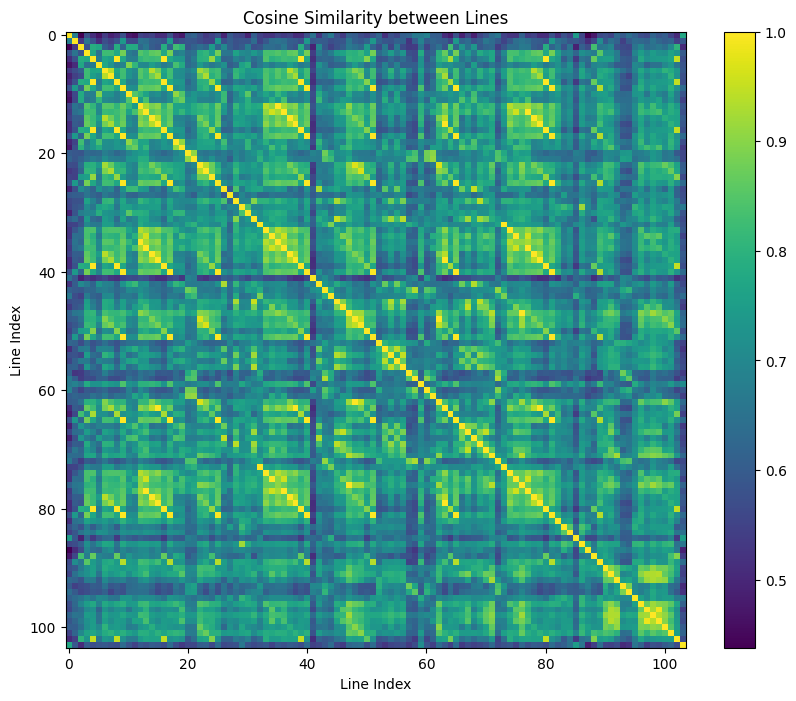

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Visualize similarity matrix
def visualize_similarity(cosine_sim):
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(cosine_sim)


## Sentence BERT

In [8]:
from sentence_transformers import SentenceTransformer

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Generate embeddings for each line
embeddings = model.encode(df['Line'].tolist())


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\anshu\.cache\huggingface\hub\models--sentence-transformers--bert-base-nli-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

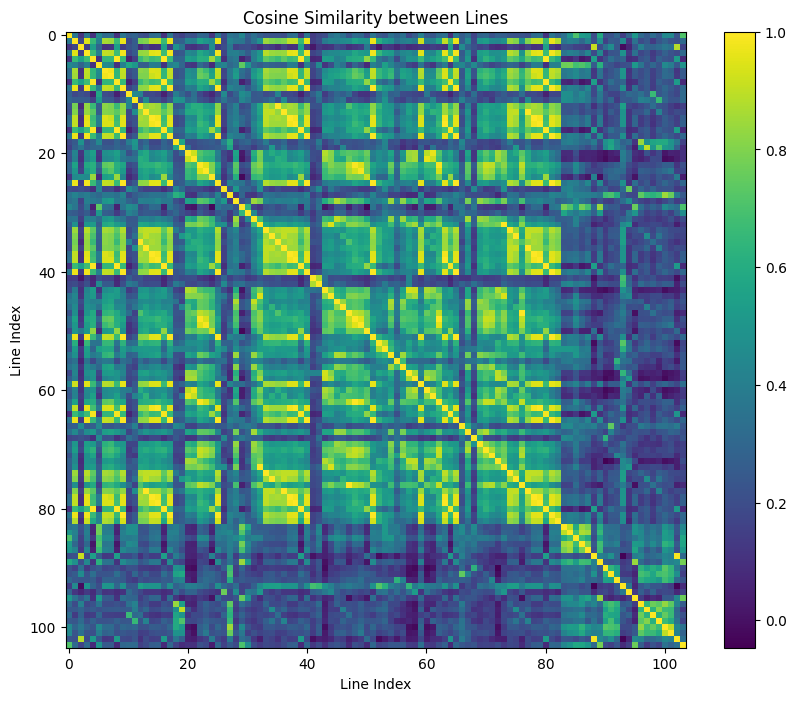

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Visualize similarity matrix
def visualize_similarity(cosine_sim):
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(cosine_sim)


In [10]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


Fractal Dimension: 0.8680447745256871
